<a href="https://colab.research.google.com/github/giovannaFantacini/KDD_DatasetDermatology/blob/main/Mineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dermatology

#### Essa base de dados trata da diferenciação diagnóstica de doenças eritemato-escamáticas. Essas doenças compartilham características clínicas de eritema e descamação, com poucas diferenças distintas. As doenças incluídas neste grupo são psoríase, dermatite seborreica, líquen plano, pitiríase rósea, dermatite crônica e pitiríase rubra pilar. Geralmente, uma biópsia é necessária para o diagnóstico, mas infelizmente essas doenças compartilham muitas características histopatológicas também. Outra dificuldade para o diagnóstico diferencial é que uma doença pode apresentar características de outra doença no início e pode ter características características nas etapas seguintes.

#### A característica de histórico familiar tem o valor 1 se alguma dessas doenças foi observada na família e 0 caso contrário.

#### As características clínicas e histopatológicas:
#### 0 => característica não estava presente
#### 3 => indica a maior quantidade possível
#### 1, 2 => indicam os valores intermediários relativos.

## Pré-processamento

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo


# fetch dataset
dermatology = fetch_ucirepo(id=33)

# Criar DataFrames para features e targets
features_df = pd.DataFrame(dermatology.data.features)
targets_df = pd.DataFrame(dermatology.data.targets)
#df completo
df = pd.concat([features_df, targets_df], axis=1)

output_file = '0-Datasets/DermatologyClear.data'

df_original = df.copy()

### Data Cleaning

In [3]:
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
display(df.head(15))
print("\n")

PRIMEIRAS 15 LINHAS



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4


In [4]:
# Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")

INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    int64  
 1   scaling                                      366 non-null    int64  
 2   definite-borders                             366 non-null    int64  
 3   itching                                      366 non-null    int64  
 4   koebner phenomenon                           366 non-null    int64  
 5   polygonal papules                            366 non-null    int64  
 6   follicular papules                           366 non-null    int64  
 7   oral-mucosal involvement                     366 non-null    int64  
 8   knee elbow involvement                       366 non-null    int64  
 9   scalp involvement                            3

In [5]:
# Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
display(df.describe())
print("\n")


DESCRIÇÃO DOS DADOS



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [6]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
display(df.isnull().sum())
print("\n")


VALORES FALTANTES



erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

In [7]:
# Imprime rotulo dos dados faltantes
print("RÓTULO VALORES FALTANTES\n")
display(df[df.isna().any(axis=1)])
print("\n")

RÓTULO VALORES FALTANTES



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,NaN,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,NaN,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,NaN,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,NaN,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,NaN,5


In [8]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'mode' # number or median or mean or mode

Index(['age'], dtype='object')


In [9]:
def UpdateMissingValues(df, column, method="mode", number=0):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana
        median = df[column].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

df_original = df.copy()

# Lista de métodos de preenchimento de valores faltantes
fill_methods = ['mean', 'median', 'mode', 'number']

# Dicionário para armazenar as descrições antes e depois do tratamento
description_dict = {'column': [], 'method': [], 'count': [], 'mean': [], 'std': [], 'min': [], '25%': [],
                    '50%': [], '75%': [], 'max': [], 'count': []}

# Loop sobre cada coluna com valores faltantes
for c in columns_missing_value:
        for method in fill_methods:

            # Fazer uma cópia do DataFrame original para cada método de preenchimento
            df_copy = df_original.copy()

            # Preencher valores faltantes com o método atual
            UpdateMissingValues(df_copy, c, method)

            # Calcular a descrição estatística antes do tratamento
            description_before = df_original['age'].describe()

            # Calcular a descrição estatística após o tratamento
            description_after = df_copy['age'].describe()

            # Adicionar as descrições ao dicionário
            description_dict['column'].append(c)
            description_dict['method'].append(method)
            description_dict['count'].append(description_before['count'].astype(float) - description_after['count'].astype(float))
            description_dict['mean'].append(description_before['mean'].astype(float) - description_after['mean'].astype(float))
            description_dict['std'].append(description_before['std'].astype(float) - description_after['std'].astype(float))
            description_dict['min'].append(description_before['min'].astype(float) - description_after['min'].astype(float))
            description_dict['25%'].append(description_before['25%'].astype(float) - description_after['25%'].astype(float))
            description_dict['50%'].append(description_before['50%'].astype(float) - description_after['50%'].astype(float))
            description_dict['75%'].append(description_before['75%'].astype(float) - description_after['75%'].astype(float))
            description_dict['max'].append(description_before['max'].astype(float) - description_after['max'].astype(float))

# Criar DataFrame a partir do dicionário
print('DIFERENÇA NA DESCRIÇÃO DOS ATRIBUTOS DA COLUNA COM DADOS FALTANTES')
description_df = pd.DataFrame(description_dict)
display(description_df)

DIFERENÇA NA DESCRIÇÃO DOS ATRIBUTOS DA COLUNA COM DADOS FALTANTES


,column,method,count,mean,std,min,25%,50%,75%,max
0,age,mean,-8.0,0.000000,0.168871,0.0,0.00,-1.0,1.75,0.0
1,age,median,-8.0,0.028330,0.167683,0.0,0.00,0.0,1.75,0.0
2,age,mode,-8.0,-0.080960,0.159171,0.0,0.00,-1.0,1.75,0.0
3,age,number,-8.0,0.793357,-0.735902,0.0,0.75,0.0,1.75,0.0


In [10]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'mode'

for c in columns_missing_value:
    UpdateMissingValues(df, c)

print('DESCRIÇÃO DOS ATRIBUTOS APOS TATAMENTO DE DADOS FALTANTES')
display(df.describe())
print("\n")
df_clean = df

Index(['age'], dtype='object')
DESCRIÇÃO DOS ATRIBUTOS APOS TATAMENTO DE DADOS FALTANTES


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.377049,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.165387,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


### Data Reduction


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px

def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    display(df.describe())
    display(df.head(10))
    print("\n")

def VisualizePcaProjection(finalDf, targetColumn):
    fig = px.scatter_3d(finalDf, x='principal component 1',
                        y='principal component 2', z='principal component 3',
                        color=targetColumn, color_continuous_scale='Viridis',
                        labels={'principal component 1': 'Principal Component 1',
                                'principal component 2': 'Principal Component 2',
                                'principal component 3': 'Principal Component 3',
                                targetColumn: 'Target'})
    fig.update_layout(title='Component PCA', title_font_size=20)
    fig.show()

names = ['erythema', 'scaling', 'definite-borders', 'itching', 'koebner phenomenon',
            'polygonal papules', 'follicular papules', 'oral-mucosal involvement', 'knee elbow involvement',
            'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate',
            'pnl infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
            'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges',
            'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis',
            'disappearance of the granular layer', 'vacuolisation and damage of the basal layer', 'spongiosis',
            'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate',
            'band-like infiltrate', 'age', 'class']
features = ['erythema', 'scaling', 'definite-borders', 'itching', 'koebner phenomenon',
            'polygonal papules', 'follicular papules', 'oral-mucosal involvement', 'knee elbow involvement',
            'scalp involvement', 'family history', 'melanin incontinence', 'eosinophils in the infiltrate',
            'pnl infiltrate', 'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
            'parakeratosis', 'clubbing of the rete ridges', 'elongation of the rete ridges',
            'thinning of the suprapapillary epidermis', 'spongiform pustule', 'munro microabcess', 'focal hypergranulosis',
            'disappearance of the granular layer', 'vacuolisation and damage of the basal layer', 'spongiosis',
            'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate',
            'band-like infiltrate', 'age']
target = 'class'

ShowInformationDataFrame(df_clean,"Dataframe original")


Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    int64  
 1   scaling                                      366 non-null    int64  
 2   definite-borders                             366 non-null    int64  
 3   itching                                      366 non-null    int64  
 4   koebner phenomenon                           366 non-null    int64  
 5   polygonal papules                            366 non-null    int64  
 6   follicular papules                           366 non-null    int64  
 7   oral-mucosal involvement                     366 non-null    int64  
 8   knee elbow involvement                       366 non-null    int64  
 9   scalp involvement                            366 non-nul

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.377049,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.165387,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41.0,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18.0,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57.0,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22.0,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30.0,4


#### Normalização por Z-score


In [12]:
# Separating out the features
x = df_clean.loc[:, features].values

# Separating out the target
y = df_clean.loc[:,[target]].values

# Z-score normalization
x_zcore = StandardScaler().fit_transform(x)
normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
normalized1Df = pd.concat([normalized1Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized1Df,"Dataframe Z-Score Normalized")

Dataframe Z-Score Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   erythema                                     366 non-null    float64
 1   scaling                                      366 non-null    float64
 2   definite-borders                             366 non-null    float64
 3   itching                                      366 non-null    float64
 4   koebner phenomenon                           366 non-null    float64
 5   polygonal papules                            366 non-null    float64
 6   follicular papules                           366 non-null    float64
 7   oral-mucosal involvement                     366 non-null    float64
 8   knee elbow involvement                       366 non-null    float64
 9   scalp involvement                            3

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,...,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,366.000000
mean,-2.620854e-16,-1.650168e-16,-3.882747e-17,3.882747e-17,-4.853434e-17,-4.853434e-17,8.372174e-17,5.338777e-17,-9.706868e-18,-2.912060e-17,...,-7.765494e-17,-1.213358e-17,1.043488e-16,2.184045e-17,-3.397404e-17,-4.368091e-17,3.882747e-17,4.368091e-17,1.844305e-16,2.803279
std,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,...,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.597803
min,-3.115648e+00,-2.562324e+00,-1.709375e+00,-1.201784e+00,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,...,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,-2.573550e+00,-5.022153e-01,-2.401973e+00,1.000000
25%,-1.028946e-01,-1.134911e+00,-6.059689e-01,-1.201784e+00,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,...,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,-1.194459e+00,-5.022153e-01,-7.512254e-01,1.000000
50%,-1.028946e-01,2.925027e-01,4.974372e-01,-3.220782e-01,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,...,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,1.846324e-01,-5.022153e-01,-2.489652e-02,3.000000
75%,-1.028946e-01,2.925027e-01,4.974372e-01,5.576279e-01,4.037610e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,3.924533e-01,5.317051e-01,...,6.200173e-01,-4.785022e-01,9.271868e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,1.846324e-01,-5.022153e-01,7.674623e-01,4.000000
max,1.403482e+00,1.719916e+00,1.600843e+00,1.437334e+00,2.609381e+00,2.669312e+00,4.972435e+00,3.148777e+00,2.429870e+00,2.743115e+00,...,2.935592e+00,2.667578e+00,1.813219e+00,2.670805e+00,6.438566e+00,5.911724e+00,1.563724e+00,2.214200e+00,2.550269e+00,6.000000


,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,-0.102895,0.292503,-1.709375,1.437334,-0.699049,-0.468702,-0.292496,-0.452637,0.392453,-0.574000,...,-0.537770,-0.478502,1.813219,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,1.229672,2
1,1.403482,1.719916,1.600843,0.557628,0.403761,-0.468702,-0.292496,-0.452637,0.392453,0.531705,...,-0.537770,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,-1.873734,1
2,-0.102895,-1.134911,0.497437,1.437334,0.403761,2.669312,-0.292496,3.148777,-0.626255,-0.574000,...,-0.537770,1.618885,1.813219,1.621970,-0.230817,-0.235125,0.184632,2.214200,-0.685195,3
3,-0.102895,0.292503,0.497437,-1.201784,-0.699049,-0.468702,-0.292496,-0.452637,2.429870,1.637410,...,2.935592,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,1.563724,-0.502215,0.239223,1
4,-0.102895,1.719916,0.497437,0.557628,1.506571,1.623308,-0.292496,1.948306,-0.626255,-0.574000,...,1.777805,2.667578,0.927187,2.670805,-0.230817,-0.235125,0.184632,2.214200,0.569373,3
5,-0.102895,1.719916,0.497437,-1.201784,-0.699049,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,...,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,0.305253,2
6,-0.102895,-1.134911,-1.709375,0.557628,-0.699049,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,...,-0.537770,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,0.184632,-0.502215,-1.213435,5
7,-0.102895,0.292503,1.600843,1.437334,2.609381,2.669312,-0.292496,1.948306,-0.626255,-0.574000,...,1.777805,1.618885,1.813219,1.621970,-0.230817,-0.235125,1.563724,2.214200,1.361731,3
8,-0.102895,0.292503,-0.605969,-1.201784,1.506571,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,...,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,0.184632,-0.502215,-0.949315,4
9,-0.102895,0.292503,-0.605969,-1.201784,0.403761,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,...,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,0.184632,-0.502215,-0.421076,4


<Figure size 2000x2000 with 0 Axes>

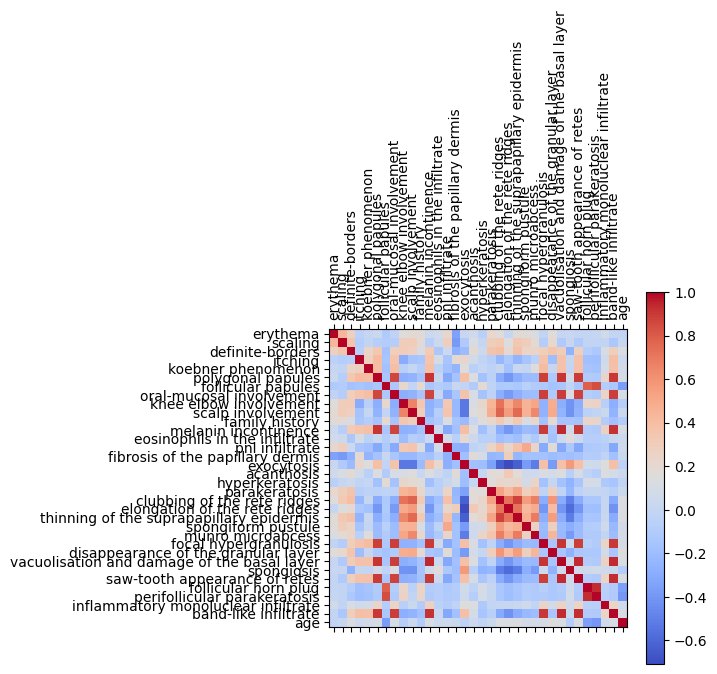

Colunas removidas:
['saw-tooth appearance of retes', 'vacuolisation and damage of the basal layer', 'follicular horn plug', 'acanthosis', 'band-like infiltrate', 'spongiosis', 'perifollicular parakeratosis', 'clubbing of the rete ridges', 'scalp involvement', 'oral-mucosal involvement', 'koebner phenomenon', 'spongiform pustule', 'elongation of the rete ridges', 'inflammatory monoluclear infiltrate', 'hyperkeratosis', 'focal hypergranulosis', 'disappearance of the granular layer', 'fibrosis of the papillary dermis', 'exocytosis', 'thinning of the suprapapillary epidermis', 'parakeratosis', 'age', 'eosinophils in the infiltrate']

DataFrame filtrado:
   erythema   scaling  definite-borders   itching  polygonal papules  \
0 -0.102895  0.292503         -1.709375  1.437334          -0.468702   
1  1.403482  1.719916          1.600843  0.557628          -0.468702   
2 -0.102895 -1.134911          0.497437  1.437334           2.669312   
3 -0.102895  0.292503          0.497437 -1.201784     

<Figure size 2000x2000 with 0 Axes>

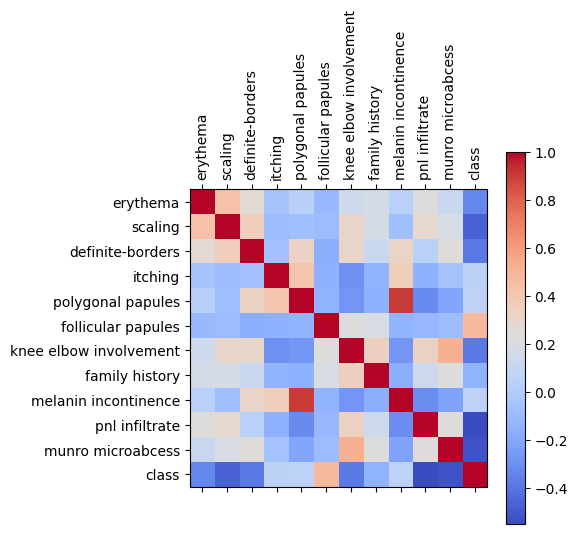

In [14]:
# Calcular a matriz de correlação
correlation_matrix = normalized1Df[features].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 20))  # Ajuste o tamanho do gráfico conforme necessário
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Definir uma métrica de corte para determinar quais colunas remover
threshold_positivo  = 0.03
threshold_negativo = -0.03

columns_to_remove = []
# Encontrar colunas com correlação dentro do intervalo especificado
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        if correlation_value <= threshold_positivo and correlation_value >= threshold_negativo:
            columns_to_remove.append(correlation_matrix.columns[j])



# Remover as colunas duplicadas da lista
columns_to_remove = list(set(columns_to_remove))

# Remover as colunas do DataFrame original
df_filtered = normalized1Df.drop(columns=columns_to_remove)

print("Colunas removidas:")
print(columns_to_remove)
print("\nDataFrame filtrado:")
print(df_filtered.head())

# Calcular a matriz de correlação
correlation_matrix = df_filtered.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 20))  # Ajuste o tamanho do gráfico conforme necessário
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [15]:
# PCA projection
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:3],
                            columns = ['principal component 1',
                                      'principal component 2',
                                       'principal component 3'])
finalDf = pd.concat([principalDf, df_filtered[[target]]], axis = 1)
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)


Explained variance per component:
[0.9049432947355729, 0.03342731496335824, 0.01744901934517261]



Dataframe PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  366 non-null    float64
 1   principal component 2  366 non-null    float64
 2   principal component 3  366 non-null    float64
 3   class                  366 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.6 KB
None


,principal component 1,principal component 2,principal component 3,class
count,3.660000e+02,3.660000e+02,3.660000e+02,366.000000
mean,3.261508e-15,-3.882747e-17,-8.736181e-17,2.803279
std,1.517562e+01,2.916664e+00,2.107275e+00,1.597803
min,-3.632822e+01,-5.838077e+00,-3.357446e+00,1.000000
25%,-1.141026e+01,-2.398428e+00,-1.925480e+00,1.000000
50%,-4.087914e-01,8.405686e-02,-2.841024e-01,3.000000
75%,1.168886e+01,1.044594e+00,2.003131e+00,4.000000
max,3.865889e+01,5.982903e+00,4.206618e+00,6.000000


,principal component 1,principal component 2,principal component 3,class
0,18.529009,1.305678,-3.357181,2
1,-28.315501,-2.603235,2.339450,1
2,-10.303796,4.894437,2.563613,3
3,3.673257,-4.415584,2.155981,1
4,8.705928,4.513982,2.484191,3
5,4.571174,0.053715,-1.934441,2
6,-18.388971,-0.212612,-1.626125,5
7,20.697137,4.801751,1.953095,3
8,-14.424161,0.728516,-1.749092,4
9,-6.432979,0.762874,-1.968506,4


#### Normalização por Min-Max

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Separating out the features
x = df_clean.loc[:, features].values

# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)
print("Dataframe Min-Max Normalized \n")
display(normalized2Df)

Dataframe Min-Max Normalized 



,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,2
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,3
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.666667,0.333333,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.333333,4
362,1.000000,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.333333,0.000000,0.0,0.0,0.666667,0.0,0.480000,4
363,1.000000,0.666667,0.666667,0.666667,1.000000,0.666667,0.0,0.666667,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.666667,1.0,0.373333,3
364,0.666667,0.333333,1.000000,0.333333,0.666667,1.000000,0.0,0.666667,0.000000,0.000000,...,0.000000,0.666667,0.000000,0.333333,0.0,0.0,0.666667,1.0,0.666667,3


<Figure size 2000x2000 with 0 Axes>

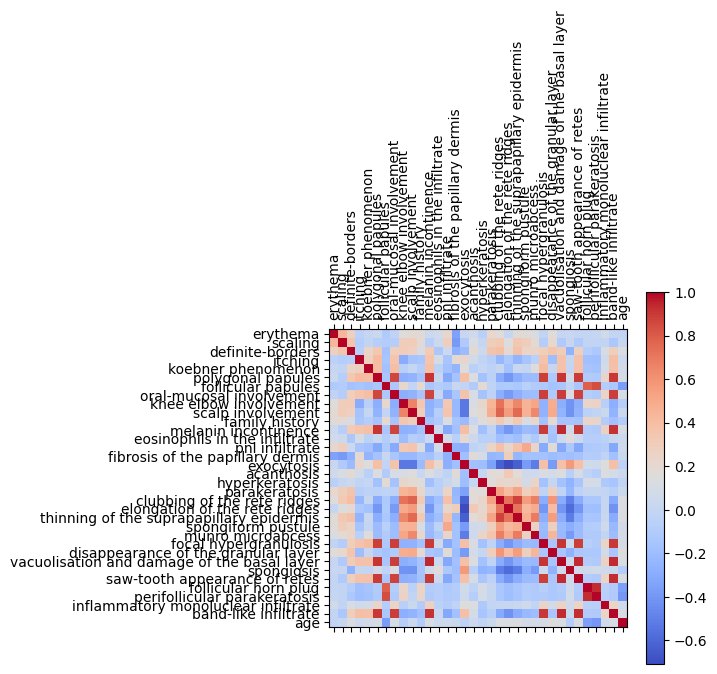

Colunas removidas:
['saw-tooth appearance of retes', 'vacuolisation and damage of the basal layer', 'follicular horn plug', 'acanthosis', 'band-like infiltrate', 'spongiosis', 'perifollicular parakeratosis', 'clubbing of the rete ridges', 'scalp involvement', 'oral-mucosal involvement', 'koebner phenomenon', 'spongiform pustule', 'elongation of the rete ridges', 'inflammatory monoluclear infiltrate', 'hyperkeratosis', 'focal hypergranulosis', 'disappearance of the granular layer', 'fibrosis of the papillary dermis', 'exocytosis', 'thinning of the suprapapillary epidermis', 'parakeratosis', 'age', 'eosinophils in the infiltrate']

DataFrame filtrado:
   erythema   scaling  definite-borders   itching  polygonal papules  \
0  0.666667  0.666667          0.000000  1.000000           0.000000   
1  1.000000  1.000000          1.000000  0.666667           0.000000   
2  0.666667  0.333333          0.666667  1.000000           1.000000   
3  0.666667  0.666667          0.666667  0.000000     

<Figure size 2000x2000 with 0 Axes>

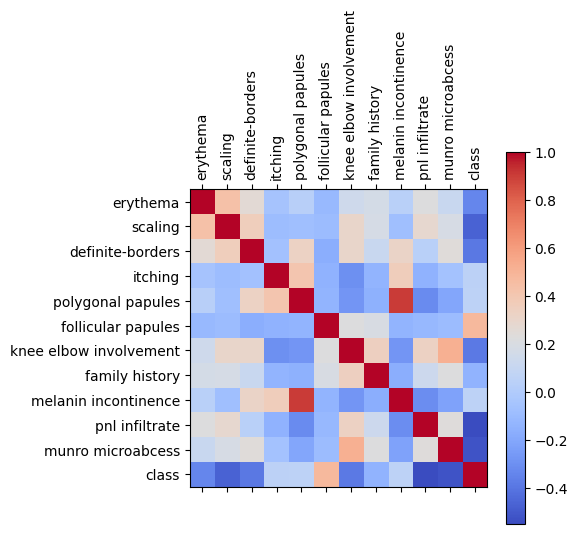

In [17]:
# Calcular a matriz de correlação
correlation_matrix = normalized2Df[features].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 20))  # Ajuste o tamanho do gráfico conforme necessário
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Definir uma métrica de corte para determinar quais colunas remover
threshold_positivo  = 0.03
threshold_negativo = -0.03

columns_to_remove = []
# Encontrar colunas com correlação dentro do intervalo especificado
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]
        if correlation_value <= threshold_positivo and correlation_value >= threshold_negativo:
            columns_to_remove.append(correlation_matrix.columns[j])



# Remover as colunas duplicadas da lista
columns_to_remove = list(set(columns_to_remove))

# Remover as colunas do DataFrame original
df_filtered = normalized2Df.drop(columns=columns_to_remove)

print("Colunas removidas:")
print(columns_to_remove)
print("\nDataFrame filtrado:")
print(df_filtered.head())

# Calcular a matriz de correlação
correlation_matrix = df_filtered.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 20))  # Ajuste o tamanho do gráfico conforme necessário
plt.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [18]:
# PCA projection
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:3],
                            columns = ['principal component 1',
                                      'principal component 2',
                                       'principal component 3'])
finalDf = pd.concat([principalDf, df_filtered[[target]]], axis = 1)
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)


Explained variance per component:
[0.9049432947355729, 0.03342731496335824, 0.01744901934517261]



Dataframe PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  366 non-null    float64
 1   principal component 2  366 non-null    float64
 2   principal component 3  366 non-null    float64
 3   class                  366 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.6 KB
None


,principal component 1,principal component 2,principal component 3,class
count,3.660000e+02,3.660000e+02,3.660000e+02,366.000000
mean,3.261508e-15,-3.882747e-17,-8.736181e-17,2.803279
std,1.517562e+01,2.916664e+00,2.107275e+00,1.597803
min,-3.632822e+01,-5.838077e+00,-3.357446e+00,1.000000
25%,-1.141026e+01,-2.398428e+00,-1.925480e+00,1.000000
50%,-4.087914e-01,8.405686e-02,-2.841024e-01,3.000000
75%,1.168886e+01,1.044594e+00,2.003131e+00,4.000000
max,3.865889e+01,5.982903e+00,4.206618e+00,6.000000


,principal component 1,principal component 2,principal component 3,class
0,18.529009,1.305678,-3.357181,2
1,-28.315501,-2.603235,2.339450,1
2,-10.303796,4.894437,2.563613,3
3,3.673257,-4.415584,2.155981,1
4,8.705928,4.513982,2.484191,3
5,4.571174,0.053715,-1.934441,2
6,-18.388971,-0.212612,-1.626125,5
7,20.697137,4.801751,1.953095,3
8,-14.424161,0.728516,-1.749092,4
9,-6.432979,0.762874,-1.968506,4


## Análise Descritiva

### Distribuições de Frequência

In [19]:
dicionario_classes = {
    1: "psoriasis",
    2: "seboreic dermatitis",
    3: "lichen planus",
    4: "pityriasis rosea",
    5: "cronic dermatitis",
    6: "pityriasis rubra pilaris"
}

In [20]:
# Defina o número de classes e calcule a amplitude de classe
num_classe = 5
amplitude_classe = (df_clean['age'].max() - df_clean['age'].min()) / num_classe

# Crie um dicionário para armazenar as tabelas de frequências por doença
tabelas_por_idade_doenca = {}

# Itere sobre cada tipo de doença
for disease_code, disease_name in dicionario_classes.items():
    data = df_clean[df_clean['class'] == disease_code]
    frequencias = []
    # Calcule as frequências
    menor = round(data['age'].min(), 1)
    valor = menor
    while valor < data['age'].max():
        frequencias.append('{} - {}'.format(round(valor, 1), round(valor + amplitude_classe, 1)))
        valor += amplitude_classe

    freq_abs = pd.cut(data['age'], bins=len(frequencias), labels=frequencias, include_lowest=True)
    freq_abs_counts = pd.value_counts(freq_abs).sort_index()

    # Calcule as frequências relativas (em porcentagem)
    total_instances = len(data)
    freq_rel_percent = (freq_abs_counts / total_instances) * 100

    # Calcule as outras informações necessárias para a tabela de frequências
    lower_limits = [float(interval.split(' - ')[0]) for interval in freq_abs_counts.index]
    upper_limits = [float(interval.split(' - ')[1]) for interval in freq_abs_counts.index]
    midpoints = [(lower + upper) / 2 for lower, upper in zip(lower_limits, upper_limits)]
    class_widths = [upper - lower for lower, upper in zip(lower_limits, upper_limits)]
    cumulative_freqs = freq_rel_percent.cumsum()

    # Construa o DataFrame das frequências para esta doença
    df_frequencias = pd.DataFrame({
        'Disease Type': [disease_name] * len(freq_abs_counts),
        'Lower Limit': lower_limits,
        'Upper Limit': upper_limits,
        'Midpoint': midpoints,
        'Class Width': class_widths,
        'Frequency': freq_abs_counts.values,
        'Relative Frequency (%)': freq_rel_percent.values,
        'Cumulative Frequency (%)': cumulative_freqs.values
    })

    # Armazene a tabela de frequências para esta doença no dicionário
    tabelas_por_idade_doenca[disease_name] = df_frequencias

# Imprima as tabelas de frequências por doença
for disease_name, tabela in tabelas_por_idade_doenca.items():
    print(f"Tabela de Frequências para a Doença: {disease_name}")
    display(tabela)
    print("\n")


Tabela de Frequências para a Doença: psoriasis


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,psoriasis,0.0,15.0,7.5,15.0,5,4.464286,4.464286
1,psoriasis,15.0,30.0,22.5,15.0,31,27.678571,32.142857
2,psoriasis,30.0,45.0,37.5,15.0,34,30.357143,62.500000
3,psoriasis,45.0,60.0,52.5,15.0,33,29.464286,91.964286
4,psoriasis,60.0,75.0,67.5,15.0,9,8.035714,100.000000




Tabela de Frequências para a Doença: seboreic dermatitis


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,seboreic dermatitis,10.0,25.0,17.5,15.0,18,29.508197,29.508197
1,seboreic dermatitis,25.0,40.0,32.5,15.0,21,34.426230,63.934426
2,seboreic dermatitis,40.0,55.0,47.5,15.0,20,32.786885,96.721311
3,seboreic dermatitis,55.0,70.0,62.5,15.0,2,3.278689,100.000000




Tabela de Frequências para a Doença: lichen planus


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,lichen planus,16.0,31.0,23.5,15.0,18,25.000000,25.000000
1,lichen planus,31.0,46.0,38.5,15.0,20,27.777778,52.777778
2,lichen planus,46.0,61.0,53.5,15.0,27,37.500000,90.277778
3,lichen planus,61.0,76.0,68.5,15.0,7,9.722222,100.000000




Tabela de Frequências para a Doença: pityriasis rosea


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,pityriasis rosea,12.0,27.0,19.5,15.0,15,30.612245,30.612245
1,pityriasis rosea,27.0,42.0,34.5,15.0,20,40.816327,71.428571
2,pityriasis rosea,42.0,57.0,49.5,15.0,9,18.367347,89.795918
3,pityriasis rosea,57.0,72.0,64.5,15.0,5,10.204082,100.000000




Tabela de Frequências para a Doença: cronic dermatitis


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,cronic dermatitis,8.0,23.0,15.5,15.0,10,19.230769,19.230769
1,cronic dermatitis,23.0,38.0,30.5,15.0,10,19.230769,38.461538
2,cronic dermatitis,38.0,53.0,45.5,15.0,18,34.615385,73.076923
3,cronic dermatitis,53.0,68.0,60.5,15.0,9,17.307692,90.384615
4,cronic dermatitis,68.0,83.0,75.5,15.0,5,9.615385,100.000000




Tabela de Frequências para a Doença: pityriasis rubra pilaris


,Disease Type,Lower Limit,Upper Limit,Midpoint,Class Width,Frequency,Relative Frequency (%),Cumulative Frequency (%)
0,pityriasis rubra pilaris,7.0,22.0,14.5,15.0,20,100.0,100.0


In [21]:
# Crie listas para armazenar os dados
disease_types = []
family_history = []
frequencies = []

# Itere sobre cada tipo de doença
for disease_code, disease_name in dicionario_classes.items():
    # Filtrar os dados para a doença específica
    data_disease = df_clean[df_clean['class'] == disease_code]

    # Calcule as frequências para cada valor do histórico familiar
    for history_value in [0, 1]:
        # Filtrar os dados para o valor específico do histórico familiar
        data_history = data_disease[data_disease['family history'] == history_value]

         # Calcule a frequência absoluta
        freq_abs = len(data_history)

        # Calcule as frequências relativas (em porcentagem)
        total_instances = len(data_disease)
        freq_rel_percent = (freq_abs / total_instances) * 100

        # Adicione os dados às listas
        disease_types.append(disease_name)
        family_history.append(history_value)
        frequencies.append(freq_rel_percent)

# Construa o DataFrame com as informações coletadas
tabela_frequencias_historico = pd.DataFrame({
    'Disease Type': disease_types,
    'Family History': family_history,
    'Frequency (%)': frequencies
})

# Imprima a tabela de frequências
display(tabela_frequencias_historico)

,Disease Type,Family History,Frequency (%)
0,psoriasis,0,71.428571
1,psoriasis,1,28.571429
2,seboreic dermatitis,0,95.081967
3,seboreic dermatitis,1,4.918033
4,lichen planus,0,98.611111
5,lichen planus,1,1.388889
6,pityriasis rosea,0,100.000000
7,pityriasis rosea,1,0.000000
8,cronic dermatitis,0,100.000000
9,cronic dermatitis,1,0.000000


In [22]:

histopathological_columns = df_clean.columns[11:33]

# Crie um dicionário para armazenar as tabelas de frequências por doença
tabelas_histop_por_doenca = {}

# Itere sobre cada tipo de doença
for disease_code, disease_name in dicionario_classes.items():
    data = df_clean[df_clean['class'] == disease_code]

    # Crie listas para armazenar as frequências para cada atributo histopatológico
    histopathological_frequencies = []
    frequencies_0 = []
    frequencies_1 = []
    frequencies_2 = []
    frequencies_3 = []

    # Calcule as frequências para cada atributo histopatológico
    for histopathological_column in histopathological_columns:
        freq_abs = data[histopathological_column].value_counts().sort_index()
        histopathological_frequencies.append(histopathological_column)
        frequencies_0.append(freq_abs.get(0, 0))
        frequencies_1.append(freq_abs.get(1, 0))
        frequencies_2.append(freq_abs.get(2, 0))
        frequencies_3.append(freq_abs.get(3, 0))

    # Construa o DataFrame das frequências para esta doença
    df_frequencias = pd.DataFrame({
        'Atributo Histopatológico': histopathological_frequencies,
        'Frequência 0': frequencies_0,
        'Frequência 1': frequencies_1,
        'Frequência 2': frequencies_2,
        'Frequência 3': frequencies_3
    })

    # Armazene a tabela de frequências para esta doença no dicionário
    tabelas_histop_por_doenca[disease_name] = df_frequencias

# Imprima as tabelas de frequências por doença
for disease_name, tabela in tabelas_histop_por_doenca.items():
    print(f"Tabela de Frequências para a Doença: {disease_name}")
    display(tabela)
    print("\n")

Tabela de Frequências para a Doença: psoriasis


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,112,0,0,0
1,eosinophils in the infiltrate,109,2,1,0
2,pnl infiltrate,34,37,35,6
3,fibrosis of the papillary dermis,112,0,0,0
4,exocytosis,93,8,11,0
5,acanthosis,1,14,70,27
6,hyperkeratosis,53,30,25,4
7,parakeratosis,1,20,69,22
8,clubbing of the rete ridges,3,15,60,34
9,elongation of the rete ridges,0,11,61,40




Tabela de Frequências para a Doença: seboreic dermatitis


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,61,0,0,0
1,eosinophils in the infiltrate,39,16,6,0
2,pnl infiltrate,17,23,20,1
3,fibrosis of the papillary dermis,61,0,0,0
4,exocytosis,1,7,32,21
5,acanthosis,4,14,35,8
6,hyperkeratosis,50,10,0,1
7,parakeratosis,24,17,17,3
8,clubbing of the rete ridges,61,0,0,0
9,elongation of the rete ridges,54,4,3,0




Tabela de Frequências para a Doença: lichen planus


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,2,8,46,16
1,eosinophils in the infiltrate,62,8,2,0
2,pnl infiltrate,72,0,0,0
3,fibrosis of the papillary dermis,70,0,2,0
4,exocytosis,1,6,38,27
5,acanthosis,1,9,43,19
6,hyperkeratosis,54,15,3,0
7,parakeratosis,15,32,20,5
8,clubbing of the rete ridges,72,0,0,0
9,elongation of the rete ridges,72,0,0,0




Tabela de Frequências para a Doença: pityriasis rosea


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,49,0,0,0
1,eosinophils in the infiltrate,46,3,0,0
2,pnl infiltrate,43,6,0,0
3,fibrosis of the papillary dermis,49,0,0,0
4,exocytosis,1,8,28,12
5,acanthosis,4,19,26,0
6,hyperkeratosis,37,9,3,0
7,parakeratosis,17,27,5,0
8,clubbing of the rete ridges,49,0,0,0
9,elongation of the rete ridges,49,0,0,0




Tabela de Frequências para a Doença: cronic dermatitis


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,52,0,0,0
1,eosinophils in the infiltrate,48,4,0,0
2,pnl infiltrate,52,0,0,0
3,fibrosis of the papillary dermis,0,8,21,23
4,exocytosis,20,20,12,0
5,acanthosis,0,7,25,20
6,hyperkeratosis,27,14,11,0
7,parakeratosis,27,11,14,0
8,clubbing of the rete ridges,49,2,1,0
9,elongation of the rete ridges,5,6,31,10




Tabela de Frequências para a Doença: pityriasis rubra pilaris


,Atributo Histopatológico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,melanin incontinence,20,0,0,0
1,eosinophils in the infiltrate,20,0,0,0
2,pnl infiltrate,17,3,0,0
3,fibrosis of the papillary dermis,20,0,0,0
4,exocytosis,2,8,8,2
5,acanthosis,0,8,11,1
6,hyperkeratosis,6,12,2,0
7,parakeratosis,2,11,7,0
8,clubbing of the rete ridges,18,2,0,0
9,elongation of the rete ridges,18,2,0,0


In [43]:
clinical_columns  = df_clean.columns[1:10]

# Crie um dicionário para armazenar as tabelas de frequências por doença
tabelas_clinical_por_doenca = {}

# Itere sobre cada tipo de doença
for disease_code, disease_name in dicionario_classes.items():
    data = df_clean[df_clean['class'] == disease_code]

    # Crie listas para armazenar as frequências para cada atributo histopatológico
    cliinical_frequencies = []
    frequencies_0 = []
    frequencies_1 = []
    frequencies_2 = []
    frequencies_3 = []

    # Calcule as frequências para cada atributo histopatológico
    for clinical_column  in clinical_columns:
        freq_abs = data[clinical_column].value_counts().sort_index()
        cliinical_frequencies.append(clinical_column)
        frequencies_0.append(freq_abs.get(0, 0))
        frequencies_1.append(freq_abs.get(1, 0))
        frequencies_2.append(freq_abs.get(2, 0))
        frequencies_3.append(freq_abs.get(3, 0))

    # Construa o DataFrame das frequências para esta doença
    df_frequencias = pd.DataFrame({
        'Atributo Clinico': cliinical_frequencies,
        'Frequência 0': frequencies_0,
        'Frequência 1': frequencies_1,
        'Frequência 2': frequencies_2,
        'Frequência 3': frequencies_3
    })

    # Armazene a tabela de frequências para esta doença no dicionário
    tabelas_clinical_por_doenca[disease_name] = df_frequencias

# Imprima as tabelas de frequências por doença
for disease_name, tabela in tabelas_clinical_por_doenca.items():
    print(f"Tabela de Frequências para a Doença: {disease_name}")
    display(tabela)
    print("\n")

Tabela de Frequências para a Doença: psoriasis


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,0,13,64,35
1,definite-borders,0,14,73,25
2,itching,55,22,21,14
3,koebner phenomenon,63,27,18,4
4,polygonal papules,112,0,0,0
5,follicular papules,109,2,1,0
6,oral-mucosal involvement,112,0,0,0
7,knee elbow involvement,23,15,54,20
8,scalp involvement,23,23,50,16




Tabela de Frequências para a Doença: seboreic dermatitis


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,0,7,43,11
1,definite-borders,21,22,18,0
2,itching,9,16,25,11
3,koebner phenomenon,60,0,1,0
4,polygonal papules,61,0,0,0
5,follicular papules,60,1,0,0
6,oral-mucosal involvement,61,0,0,0
7,knee elbow involvement,57,4,0,0
8,scalp involvement,56,3,2,0




Tabela de Frequências para a Doença: lichen planus


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,2,28,37,5
1,definite-borders,1,10,42,19
2,itching,2,9,28,33
3,koebner phenomenon,20,18,23,11
4,polygonal papules,3,1,41,27
5,follicular papules,72,0,0,0
6,oral-mucosal involvement,5,9,45,13
7,knee elbow involvement,71,0,1,0
8,scalp involvement,70,2,0,0




Tabela de Frequências para a Doença: pityriasis rosea


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,0,24,25,0
1,definite-borders,9,22,18,0
2,itching,33,10,5,1
3,koebner phenomenon,9,25,12,3
4,polygonal papules,49,0,0,0
5,follicular papules,49,0,0,0
6,oral-mucosal involvement,49,0,0,0
7,knee elbow involvement,49,0,0,0
8,scalp involvement,49,0,0,0




Tabela de Frequências para a Doença: cronic dermatitis


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,6,34,11,1
1,definite-borders,23,16,11,2
2,itching,8,7,20,17
3,koebner phenomenon,52,0,0,0
4,polygonal papules,52,0,0,0
5,follicular papules,43,6,3,0
6,oral-mucosal involvement,52,0,0,0
7,knee elbow involvement,50,2,0,0
8,scalp involvement,52,0,0,0




Tabela de Frequências para a Doença: pityriasis rubra pilaris


,Atributo Clinico,Frequência 0,Frequência 1,Frequência 2,Frequência 3
0,scaling,0,5,15,0
1,definite-borders,5,9,6,0
2,itching,11,8,1,0
3,koebner phenomenon,20,0,0,0
4,polygonal papules,20,0,0,0
5,follicular papules,0,2,12,6
6,oral-mucosal involvement,20,0,0,0
7,knee elbow involvement,1,7,9,3
8,scalp involvement,14,2,4,0


### Visualização dos Dados

In [23]:
import plotly.express as px

# Crie o gráfico de linhas com Plotly Express
fig = px.line()

# Itere sobre cada tabela de frequências por doença
for disease_name, tabela in tabelas_por_idade_doenca.items():
    # Adicione a linha correspondente à doença ao gráfico
    fig.add_scatter(x=tabela['Midpoint'], y=tabela['Frequency'], mode='lines', name=disease_name)

# Adicione título e rótulos aos eixos
fig.update_layout(title='Frequência de Doenças por Idade',
                   xaxis_title='Idade',
                   yaxis_title='Frequência')

# Mostre o gráfico
fig.show()

In [26]:
# Reorganize os dados para criar o gráfico de barras empilhadas
stacked_data = tabela_frequencias_historico.pivot(index='Disease Type', columns='Family History', values='Frequency (%)')

# Resetando o índice para manter 'Disease Type' como uma coluna
stacked_data.reset_index(inplace=True)

# Crie o gráfico de barras empilhadas com Plotly Express
fig = px.bar(stacked_data, x='Disease Type', y=[0, 1], title='Influência do Histórico Familiar em Cada Doença',
             labels={'value': 'Frequência Relativa (%)', 'variable': 'Histórico Familiar'},
             barmode='stack')


# Mostre o gráfico
fig.show()

In [30]:
for doenca in tabelas_histop_por_doenca.keys():
    stacked_data = tabelas_histop_por_doenca[doenca].melt(id_vars=['Atributo Histopatológico'],
                                                          value_vars=['Frequência 0', 'Frequência 1', 'Frequência 2', 'Frequência 3'],
                                                          var_name='Valor', value_name='Frequência')

    # Continuação do código para plotar o gráfico de barras empilhadas
    fig = px.bar(stacked_data, x='Atributo Histopatológico', y='Frequência', color='Valor',
                title=f'Distribuição de Atributos Histopatológicos para {doenca}',
                barmode='stack')

    fig.show()

In [44]:
for doenca in tabelas_clinical_por_doenca.keys():
    stacked_data = tabelas_clinical_por_doenca[doenca].melt(id_vars=['Atributo Clinico'],
                                                          value_vars=['Frequência 0', 'Frequência 1', 'Frequência 2', 'Frequência 3'],
                                                          var_name='Valor', value_name='Frequência')

    # Continuação do código para plotar o gráfico de barras empilhadas
    fig = px.bar(stacked_data, x='Atributo Clinico', y='Frequência', color='Valor',
                title=f'Distribuição de Atributos Clinicos para {doenca}',
                barmode='stack')

    fig.show()

### Medidas de Tendência Central

Média, Moda, Mediana, Ponto Médio  


In [31]:
measures = {
    'Feature': [],
    'Mean': [],
    'Mode': [],
    'Median': [],
    'Ponto Médio': []
}

for column in df_clean.columns:
    if df_clean[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Mean'].append(df_clean[column].mean())
        measures['Mode'].append(df_clean[column].mode().values[0])
        measures['Median'].append(df_clean[column].median())
        measures['Ponto Médio'].append((df_clean[column].max() + df_clean[column].min())/2)


table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Mean': measures['Mean'],
    'Mode': measures['Mode'],
    'Median' : measures['Median'],
    'Ponto Médio' : measures['Ponto Médio']
})

display(table_measures)


,Feature,Mean,Mode,Median,Ponto Médio
0,erythema,2.068306,2.0,2.0,1.5
1,scaling,1.795082,2.0,2.0,1.5
2,definite-borders,1.549180,2.0,2.0,1.5
3,itching,1.366120,0.0,1.0,1.5
4,koebner phenomenon,0.633880,0.0,0.0,1.5
5,polygonal papules,0.448087,0.0,0.0,1.5
6,follicular papules,0.166667,0.0,0.0,1.5
7,oral-mucosal involvement,0.377049,0.0,0.0,1.5
8,knee elbow involvement,0.614754,0.0,0.0,1.5
9,scalp involvement,0.519126,0.0,0.0,1.5


### Medidas de dispersão

Amplitude, Desvio Padrão  

In [32]:
measures = {
    'Feature': [],
    'Range': [],
    'Standard Deviation': [],
}


for column in df_clean.columns:
    if df_clean[column].dtype in [int, float]:
        measures['Feature'].append(column)
        measures['Range'].append(df_clean[column].max() - df_clean[column].min())
        measures['Standard Deviation'].append(df_clean[column].std())


table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Range': measures['Range'],
    'Standard Deviation': measures['Standard Deviation']
})

display(table_measures)


,Feature,Range,Standard Deviation
0,erythema,3.0,0.664753
1,scaling,3.0,0.701527
2,definite-borders,3.0,0.907525
3,itching,3.0,1.138299
4,koebner phenomenon,3.0,0.908016
5,polygonal papules,3.0,0.957327
6,follicular papules,3.0,0.570588
7,oral-mucosal involvement,3.0,0.834147
8,knee elbow involvement,3.0,0.982979
9,scalp involvement,3.0,0.905639


### Medidas de Posição Relativa

Z-Score, Quantis

In [33]:
measures = {
    'Feature': [],
    'Z-Score': [],
    '25th Percentile': [],
    '50th Percentile': [],
    '75th Percentile': []
}

for column in df_clean.columns:
    if df_clean[column].dtype in [int, float]:
        measures['Feature'].append(column)

        # Z-Score
        z_score = (df_clean[column] - df_clean[column].mean()) / df_clean[column].std()
        measures['Z-Score'].append(z_score.iloc[0])

        # Quantiles
        q25 = np.percentile(df_clean[column], 25)
        q50 = np.percentile(df_clean[column], 50)
        q75 = np.percentile(df_clean[column], 75)
        measures['25th Percentile'].append(q25)
        measures['50th Percentile'].append(q50)
        measures['75th Percentile'].append(q75)

table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Z-Score': measures['Z-Score'],
    '25th Percentile': measures['25th Percentile'],
    '50th Percentile': measures['50th Percentile'],
    '75th Percentile' : measures['75th Percentile']
})

display(table_measures)


,Feature,Z-Score,25th Percentile,50th Percentile,75th Percentile
0,erythema,-0.102754,2.0,2.0,2.0
1,scaling,0.292103,1.0,2.0,2.0
2,definite-borders,-1.707038,1.0,2.0,2.0
3,itching,1.435369,0.0,1.0,2.0
4,koebner phenomenon,-0.698093,0.0,0.0,1.0
5,polygonal papules,-0.468061,0.0,0.0,0.0
6,follicular papules,-0.292096,0.0,0.0,0.0
7,oral-mucosal involvement,-0.452018,0.0,0.0,0.0
8,knee elbow involvement,0.391917,0.0,0.0,1.0
9,scalp involvement,-0.573215,0.0,0.0,1.0


### Medidas de Associação

Covariância e Correlação

In [35]:
measures = {
    'Feature': [],
    'Covariance': [],
    'Correlation': []
}

for column in df_clean.columns:
    if df_clean[column].dtype in [int, float]:
        measures['Feature'].append(column)

        # Covariance
        cov_value = df_clean[column].cov(df_clean['class'])
        measures['Covariance'].append(cov_value)

        # Correlation
        corr_value = df_clean[column].corr(df_clean['class'])
        measures['Correlation'].append(corr_value)

table_measures = pd.DataFrame({
    'Feature': measures['Feature'],
    'Covariance':  measures['Covariance'],
    'Correlation': measures['Correlation']
})

display(table_measures)

,Feature,Covariance,Correlation
0,erythema,-0.356389,-0.335537
1,scaling,-0.525354,-0.468688
2,definite-borders,-0.568381,-0.391974
3,itching,0.099618,0.054772
4,koebner phenomenon,-0.132495,-0.091323
5,polygonal papules,0.088390,0.057785
6,follicular papules,0.435616,0.477813
7,oral-mucosal involvement,0.074377,0.055805
8,knee elbow involvement,-0.602021,-0.383305
9,scalp involvement,-0.771570,-0.533208
